In [1]:
!ls data

random_paths_benchmark.csv  santa_cities.csv


In [2]:
!head data/santa_cities.csv

In [3]:
import time
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

#from concorde.tsp import TSPSolver

In [4]:
path = "data/"
df   = pd.read_csv(path+"santa_cities.csv") # index_col="id"
sub  = pd.read_csv(path+"random_paths_benchmark.csv")
df

,id,x,y
0,0,4360,6178
1,1,10906,14956
2,2,5071,8963
3,3,13853,4105
4,4,18885,3168
...,...,...,...
149995,149995,7585,1056
149996,149996,13993,1775
149997,149997,13820,16485
149998,149998,16927,595


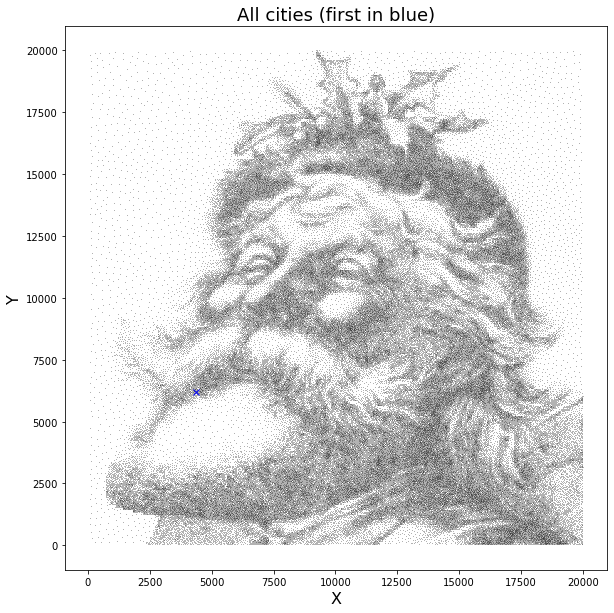

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(111, adjustable='box', aspect=1.0)
plt.plot(df.x, df.y, 'k,', alpha=0.3)
plt.plot(df.x[0], df.y[0], 'bx')
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('All cities (first in blue)', fontsize=18)
plt.show()

# Aux functions

In [6]:
def total_distance(df_path):
    dist = (np.sqrt((df_path.x - df_path.x.shift())**2 +
                    (df_path.y - df_path.y.shift())**2)).sum()
    return round(dist,2)

In [7]:
def plot_path(path, df, size=8, verbose=True):
    df_path = pd.merge(pd.DataFrame({'id':path}), df, on='id', how="left")
    
    plt.figure(figsize=(size,size))
    plt.subplot(111, adjustable='box', aspect=1.0)
    plt.plot(df_path.x, df_path.y, linewidth=1)
    plt.plot(df_path.x[0], df_path.y[0], 'ro') # r: red, o: circle
    
    if verbose:
        print(*path)
        for i in range(len(df)):
            plt.annotate(df.id[i], (df.x[i], df.y[i]))
            
    plt.title(str(len(set(path)))+' cities: '+str(total_distance(df_path)), fontsize=18)
    plt.show()

0 2 5 1 8 3 4 9 6 7 0


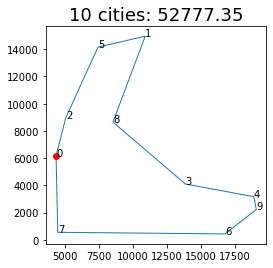

In [8]:
plot_path([0,2,5,1,8,3,4,9,6,7,0], df[:10], size=4)

# Greedy: Nearest Neighbour

In [10]:
def nearest_neighbour(df):
    ids = df.index.values[1:]
    xy = np.array([df.x.values, df.y.values]).T[1:]
    path = [0,]
    for _ in tqdm(range(len(df)-1)):
        last_x, last_y = df.x[path[-1]], df.y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy  = np.delete(xy,  nearest_index, axis=0)
    path.append(0)
    return path


0 2 8 5 1 3 6 9 4 7 0


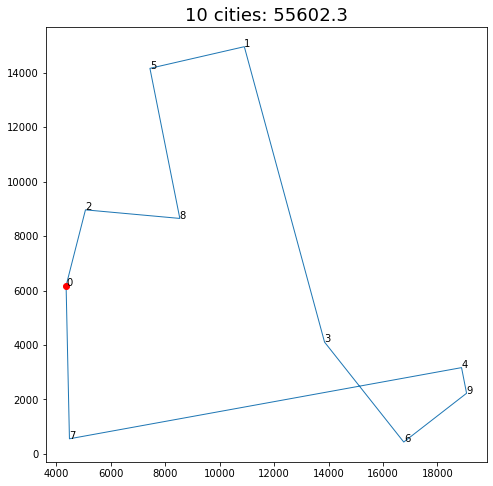

In [11]:
path = nearest_neighbour(df[:10])
plot_path(path, df[:10], size=8, verbose=True)


0 38 95 2 88 93 83 8 10 66 27 24 20 14 79 72 5 23 33 39 13 50 41 1 29 45 46 75 74 12 18 86 49 89 34 97 32 58 43 82 35 64 3 60 31 84 25 53 65 69 91 77 78 4 9 48 30 98 51 47 6 52 85 21 55 36 62 11 26 61 56 68 19 90 67 76 22 92 54 63 17 96 28 15 70 42 94 37 40 80 7 44 73 99 81 57 16 59 87 71 0


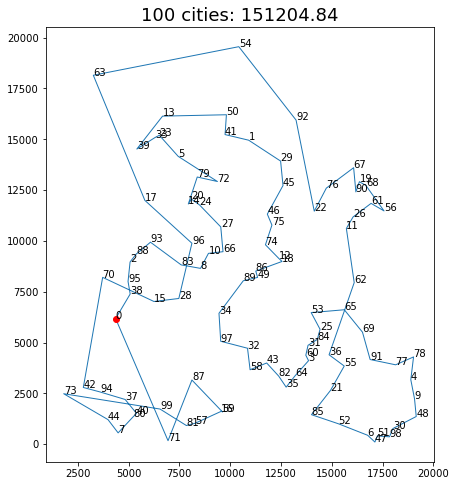

In [12]:
path = nearest_neighbour(df[:100])
plot_path(path, df[:100], size=8, verbose=True)

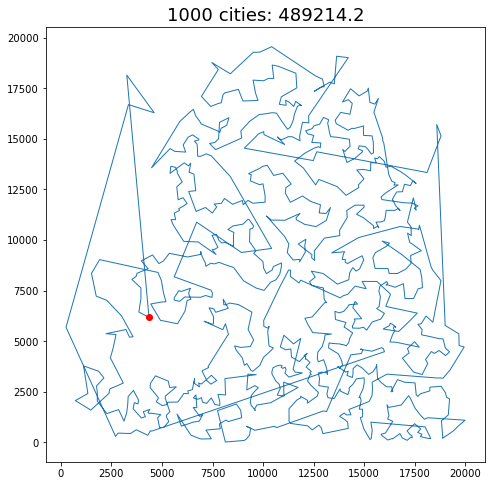

In [13]:
path = nearest_neighbour(df[:1000])
plot_path(path, df[:1000], size=8, verbose=False)

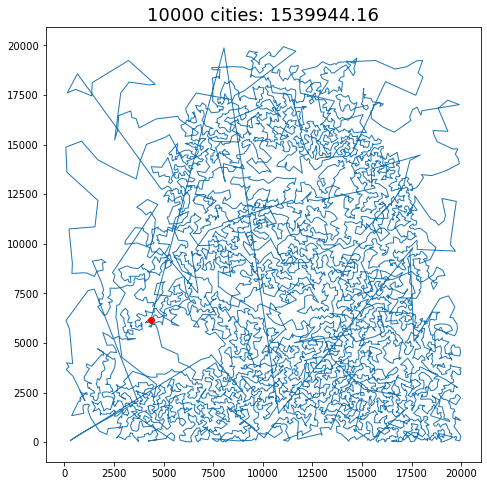

In [14]:
path = nearest_neighbour(df[:10000])
plot_path(path, df[:10000], size=8, verbose=False)

# 03:08 mins

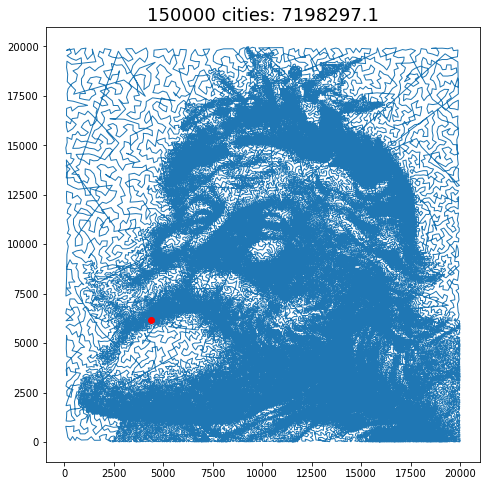

In [15]:
path = nearest_neighbour(df)
plot_path(path, df, size=8, verbose=False)